In [25]:
import requests, pandas as pd, numpy as np
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [26]:
#Part 1, step 1
html = requests.get('https://cmsc320.github.io/files/top-50-solar-flares.html').text
soup = BeautifulSoup(html, "html")
table = soup.find('table', {"class": "table table-striped table-responsive-md"})
dfm = pd.read_html(str(table))[0]
dfm.rename(columns={"Unnamed: 0": "rank", "Unnamed: 1": "x_classification","Unnamed: 2": "date", "Start": "start_time", "End": "end_time", "Maximum": "max_time", "Region": "region", "Unnamed: 7": "movie"}, inplace=True)
dfm

,rank,x_classification,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


This code gets the html from the provided WSL website mirror, converts it into a BeautifulSoup object which enables parsing, and then the BeautifulSoup object is searched for the relevant table. This table is converted into a pandas dataframe simply by reading the html through a provided method, and then the columns are appropriately renamed and the dataframe is displayed.

In [27]:
#Part 1, step 2
dfm.drop('movie', axis = 1, inplace = True)

for index, row in dfm.iterrows():
    start = dfm.at[index, "start_time"]
    maximum = dfm.at[index, "max_time"]
    end = dfm.at[index, "end_time"]
    dt = dfm.at[index,"date"]
    
    combined_start = datetime.combine(datetime.strptime(dt, '%Y/%m/%d'), datetime.strptime(start, '%H:%M').time())
    combined_max = datetime.combine(datetime.strptime(dt, '%Y/%m/%d'), datetime.strptime(maximum, '%H:%M').time())
    combined_end = datetime.combine(datetime.strptime(dt, '%Y/%m/%d'), datetime.strptime(end, '%H:%M').time())
    
    dfm.at[index, "start_time"] = combined_start
    dfm.at[index, "max_time"] = combined_max
    dfm.at[index, "end_time"] = combined_end
    
    
dfm.drop('date', axis = 1, inplace = True)

dfm.rename(columns={"start_time": "start_datetime", "max_time": "max_datetime", "end_time": "end_datetime"}, inplace=True)
dfm = dfm[['rank', 'x_classification', 'start_datetime', 'max_datetime', 'end_datetime', 'region']]
dfm.replace("-", "NaN")

,rank,x_classification,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


The last column 'movies' is first dropped since it's not used. We then iterate through each row of the dataframe, extracting the date and relevant times from each row. These are combined using the datetime.combine() function, and then the times are updated. The "date" column is dropped and the time columns are renamed as datetime columns. The dataframe columns are reordered, and the missing regions are reported "-". The resulting dataframe is displayed.

In [28]:
#Part 1, step 3
html = requests.get('https://cmsc320.github.io/files/waves_type2.html').text
soup = BeautifulSoup(html, "html")
table = soup.find("pre")

rows = str(table).split("\n")
df = pd.DataFrame(columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed'])

for i in range(12, len(rows) - 2):
    raw = rows[i].split(" ")
    data = []

    for elm in raw:
        if(elm != "" and elm[0] != "<" and  not "href" in elm):
            data.append(elm)
        elif("href" in elm):
            href = elm.split(">")
            data.append(href[1].replace("</a", ""))

    for i in range(len(data) - 14):
        del data[-1]
    df.loc[len(df.index)] = data

df

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252


Now the NASA website is scraped, again: 1. using a GET request to get the html for the page; 2. converting to a BeautifulSoup object for parsing; 3. searching the BeautifulSoup object for the relevant section. This is then converted into an array of rows by splitting at each newline, and an empty dataframe is created with the necessary columns. We iterate only through the rows of the text with relevant content (The first 12 and last 2 lines are ignored), splitting at each space. Junk values are discarded, such as those serving only a purpose for HTML syntax or double spaces, and we append to a new array only relevant data sections. Some rows contain more than the 14 rows we require, because of added material at the end of the row, so we require that the data array only contains the first 14 elements. Then, we add this entire row of data to the dataframe, and repeat the process until we iterate through the entire relevant block of text. The resulting dataframe is displayed.

In [29]:
#Part 1, step 4
df.replace("????", "NaN", inplace = True)
df.replace("---", "NaN", inplace = True)
df.replace("----", "NaN", inplace = True)
df.replace("-----", "NaN", inplace = True)
df.replace("------", "NaN", inplace = True)
df.replace("--/--", "NaN", inplace = True)
df.replace("--:--", "NaN", inplace = True)
df.replace("LASCO DATA GAP", "NaN", inplace = True)

is_halo = []
width_lower_bound = []

for index, row in df.iterrows():
    if(df.at[index, 'cme_angle'] == 'Halo'):
        is_halo.append(True)
        df.at[index, 'cme_angle'] = 'NA'
    else:
        is_halo.append(False)
    
    if(not df.at[index, 'cme_width'].isnumeric() and not df.at[index, 'cme_width'] == 'NaN'):
        width_lower_bound.append(True)
        df.at[index, 'cme_width'] = (df.at[index, 'cme_width'].replace("&gt;", ""))
        df.at[index, 'cme_width'] = (df.at[index, 'cme_width'].replace("h", ""))
    else:
        width_lower_bound.append(False)
    
df = df.assign(is_halo=is_halo)
df = df.assign(width_lower_bound=width_lower_bound)

In [30]:
for index, row in df.iterrows():
    start_date = df.at[index, "start_date"]
    start_time = df.at[index, "start_time"]
    end_date = df.at[index, "end_date"]
    end_time = df.at[index, "end_time"]
    cme_date = df.at[index, "cme_date"]
    cme_time = df.at[index, "cme_time"]
    start_flag = 0
    end_flag = 0
    cme_flag = 0
    
    
    if(start_time == '24:00'):
        start_time = '00:00'
        start_flag = 1
    if(end_time == '24:00'):
        end_time = '00:00'
        end_flag = 1
    if(cme_time == '24:00'):
        cme_time = '00:00'
        cme_flag = 1
    
    if(start_date != 'NaN' and start_time != 'NaN'):
        start_datetime = datetime.combine(datetime.strptime(start_date, '%Y/%m/%d'), datetime.strptime(start_time, '%H:%M').time())
    if(end_date != 'NaN' and end_time != 'NaN'):
        end_datetime = datetime.combine(datetime.strptime(start_date[:5] + end_date, '%Y/%m/%d'), datetime.strptime(end_time, '%H:%M').time())
    if(cme_date != 'NaN' and cme_time != 'NaN'):
        cme_datetime = datetime.combine(datetime.strptime(start_date[:5] + cme_date, '%Y/%m/%d'), datetime.strptime(cme_time, '%H:%M').time())
    
    if(start_flag == 1):
        start_datetime += timedelta(days = 1)
        start_flag = 0
        
    if(end_flag == 1):
        end_datetime += timedelta(days = 1)
        end_flag = 0
    
    if(cme_flag == 1):
        cme_datetime += timedelta(days = 1)
        cme_flag = 0
    
    df.at[index, "start_date"] = start_datetime
    df.at[index, "end_date"] = end_datetime
    df.at[index, "cme_date"] = cme_datetime
    
df.drop('start_time', axis = 1, inplace = True)
df.drop('end_time', axis = 1, inplace = True)
df.drop('cme_time', axis = 1, inplace = True)

df.rename(columns={"start_date": "start_datetime", "end_date": "end_datetime", "cme_date": "cme_datetime", "flare_classification": "importance", "cme_angle": "cpa", "cme_width":"width", "cme_speed": "speed"}, inplace=True)

df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NA,360,1418,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,False,False


The NASA dataframe is cleaned up by replacing all missing entries, as defined in the manual provided by NASA, with "NaN". We then create two seperate lists containing information on whether a flare is a halo, and whether the width is a lower bound. Again iterating through each array of the dataframe, if a flare is a halo we replace the cme_angle value with 'NA' and append true to the is_halo array, otherwise we simply append false. Similarly we check if the width is a lower bound for each row, and if so we remove any non-numeric characters and append True to the width_lower_bound array, otherwise we append false. We update the dataframe with these two new columns, along with appropriate names. 

In the next codeblock, we combine the date and time columns through a similar process as we followed with the SWL dataframe, extracting the relevant values, using datetime.combine(), and updating the old values. We now have a new issue to contend with however: some of the times are recorded as 24:00. If this was the case, we simply make note of it with a flag, reset the time to 00:00 and later add 1 day to the date using the flags. We then drop and rename columns as appropriate, and display the final dataframe.

In [31]:
#Part 2, question 1

x_class = []
for index, row in df.iterrows():
    if(df.at[index, 'importance'][0].lower() == 'x'):
        x_class.append((index, df.at[index, 'importance'][1:]))
            
sorted_x_class = sorted(x_class, key = lambda x: float(x[1]), reverse = True)
nasa_50 = pd.DataFrame(columns=df.columns)

for i in range(50):
    index, mag = sorted_x_class[i]
    nasa_50 = nasa_50.append(df.loc[index],  ignore_index=True)

nasa_50

/var/folders/49/ggfcxcws3m54ppj9m6wxn8gw0000gn/T/ipykernel_43422/155864731.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nasa_50 = nasa_50.append(df.loc[index],  ignore_index=True)
/var/folders/49/ggfcxcws3m54ppj9m6wxn8gw0000gn/T/ipykernel_43422/155864731.py:13: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  nasa_50 = nasa_50.append(df.loc[index],  ignore_index=True)


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_halo,width_lower_bound
0,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NA,360,2657,True,False
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False
2,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NA,360,2459,True,False
3,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False
4,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NA,360,2029,True,False
5,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False
6,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False
7,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,2006-11-06 17:54:00,NaN,NaN,NaN,False,False
8,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,True,False
9,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False


We search through the NASA dataframe for all the strongest x-class solar flares, adding the dataframe index and importance value as a tuple to a tentative list. This list is sorted by the importance value. A new dataframe is created with the same columns as the original NASA dataframe, and we iterate through the first 50 entries of our sorted list, appending the top 50 strongest flares as rows to out new dataframe, with new ordering. The resulting dataframe is displayed.

Many of the flares in the top 50 according to NASA correspond roughly 1:1 to a flare from the SWL top 50, with minor differences in date or recorded importance, or the region could be offset by a leading '1' or '10'. However many flares did not correspond very well at all, especially the further down the list we went. 

In [32]:
#Part 2, question 2
#finds correlation between 2 rows
def correlation(swl_row, nasa_row):
    swl_imp = swl_row['x_classification']
    if(swl_row['x_classification'][-1] == '+'):
        swl_imp = swl_row['x_classification'][0:len(swl_row['x_classification']) - 1]
    importance_score = abs(float(nasa_row['importance'][1:]) - float(swl_imp[1:]))
    
    nasa_reg = nasa_row['flare_region']
    if(nasa_row['flare_region'] != 'NaN'and float(nasa_row['flare_region']) > 10000):
        nasa_reg = nasa_reg[1:]
    region_score = abs(float(nasa_reg) - float(swl_row['region']))
    date_score = abs((nasa_row['start_datetime'].date() - swl_row['start_datetime'].date()).days)
    adj_score = date_score + (importance_score * 10)
    
    if(adj_score < 1.5 and region_score == 0):
        return 0
    
    return(adj_score)    

In [33]:
#matches contains the NASA row index (j) and correlation value that best matches the SWL row (i)
matches = [[0 for x in range(50)] for y in range(50)]
best_matches = []

for swl_row in range(50):
    for nasa_row in range(50):
        matches[swl_row][nasa_row] = (swl_row, nasa_row, correlation(dfm.loc[swl_row,:], nasa_50.loc[nasa_row,:]))  
    
def lowest_corr_row(swl_row_checked, matches, already_matched):
    lowest_corr = float(np.inf)
    indices = (-1, -1)
    
    for swl_row in range(50):
        for nasa_row in range(50):
            swl_row_match, nasa_row_match, corr = matches[swl_row][nasa_row]
            if(nasa_row_match == swl_row_checked and already_matched.count(swl_row_match) == 0):
                if(corr < lowest_corr):
                    lowest_corr = corr
                    indices = (swl_row_match, nasa_row_match)
                    break
    swl_row_match, nasa_row_match = indices
    already_matched.append(swl_row_match)
    return(indices)
            
swl_rank = []
already_matched = []
for index in range(50):
    swl_row, nasa_row = lowest_corr_row(index, matches, already_matched)
    best_matches.append(matches[swl_row][nasa_row])
    swl_rank.append(swl_row)
 
nasa_50 = nasa_50.assign(swl_rank=swl_rank)

print("Best matches between NASA & SWL rows:")
print()
print()

sorted_best_matches = sorted(best_matches, key = lambda x: x[0])

for i in range(50):
    swl_row, nasa_row, score = sorted_best_matches[i] 
    print("Row " + str(swl_row) + " from SWL is best matched by row " + str(nasa_row) + " from NASA")
    print("Correlation score: " + str(score))
    print()

nasa_50

Best matches between NASA & SWL rows:


Row 0 from SWL is best matched by row 0 from NASA
Correlation score: 0

Row 1 from SWL is best matched by row 1 from NASA
Correlation score: 0

Row 2 from SWL is best matched by row 2 from NASA
Correlation score: 1.999999999999993

Row 3 from SWL is best matched by row 48 from NASA
Correlation score: 383.0

Row 4 from SWL is best matched by row 3 from NASA
Correlation score: 4.0000000000000036

Row 5 from SWL is best matched by row 4 from NASA
Correlation score: 0

Row 6 from SWL is best matched by row 5 from NASA
Correlation score: 0

Row 7 from SWL is best matched by row 6 from NASA
Correlation score: 0

Row 8 from SWL is best matched by row 7 from NASA
Correlation score: 0

Row 9 from SWL is best matched by row 8 from NASA
Correlation score: 0

Row 10 from SWL is best matched by row 9 from NASA
Correlation score: 1.0000000000000142

Row 11 from SWL is best matched by row 10 from NASA
Correlation score: 0

Row 12 from SWL is best matched by row

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_halo,width_lower_bound,swl_rank
0,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NA,360,2657,True,False,0
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False,1
2,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NA,360,2459,True,False,2
3,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False,4
4,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NA,360,2029,True,False,5
5,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False,6
6,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False,7
7,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,2006-11-06 17:54:00,NaN,NaN,NaN,False,False,8
8,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,True,False,9
9,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False,10


Rows were determined to be "best matches" on the basis of a computed correlation score. 
This score had three factors: date_score, region_score, and importance_score.

The date score was simply the absolute difference in days between the two flares' dates.
The region score was the absolute difference in region number of the two flares.
The importance score was the absolute difference in the importance of the two flares.

An adjusted score was calculated by adding (10 x importance_score) + date_score in a crude attempt to give equal weighting to the two metrics. If the region score was exactly 0, and the adjusted score was within an accepted bound of 1.5, a correlation of '0' was returned, indicating a match that was close enough to perfect. Otherwise, the adjusted score was returned. The returned value was the correlation score

A correlation score between every SWL row and every NASA row was found. Each correlation score was stored with the SWL index and NASA index involved in a 50x50 matrix. For each relevant NASA row index, the matrix was searched for the lowest correlation score, that also did not involve an SWL row already matched. The NASA row index, SWL row index, and correlation score between the two was added to a 'best_matches' array. This process ensures uniqueness, as each NASA row is matched exactly once, 1:1 to an SWL row. There were several SWL rows which matched the same NASA row, but this process ensured that only the lowest correlation score to that NASA row was considered, indicating the NASA flare closest in date and importance to the selected SWL flare.

The best matches were then sorted in order of SWL row and the output was printed in an easy to read format. The SWL rank column was added to the nasa dataframe which was then displayed.

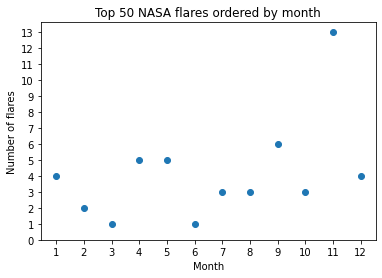

In [34]:
#Part 2, question 3
flares_per_month = {}

for index, row in nasa_50.iterrows():
    month = nasa_50.at[index, 'start_datetime'].month
    if month in flares_per_month:
        flares_per_month[month] += 1
    else:
        flares_per_month[month] = 1

plt.scatter(flares_per_month.keys(), flares_per_month.values())
plt.title("Top 50 NASA flares ordered by month")
plt.xlabel('Month')
plt.ylabel('Number of flares')
plt.xticks(np.arange(1, 13, 1))
plt.yticks(np.arange(0, 14, 1))
plt.show()

This plot was intended to see whether strong flares were clustered in time, based on the month in which they occur. If there were no relationship, we would expect a roughly constant number of strong flares per month, with few outliers. 

The plot was a bit more irregular than what was expected. The number of flares was plotted on a scatterplot with the month in which they occured, and there did appear to be some degree of clustering and irregularities.

Based on this plot, we suspect that there is some degree of clustering because of the irregular high outliers, drops in flares some months, as well as the tendency for months with many flares to follow each other and likewise for months with few flares. More investigation is necessary, but it is an indication of a pattern which indicates some relationship.